# Outros plots
- Como já mencionado nos outros notebooks, existem diversos outros tipos de plots que vocês podem explorar
    - Novamente, de uma olhada na [galeria de exemplos](https://matplotlib.org/stable/gallery/index.html) da biblioteca
    - Na verade, ela é uma excelente fonte de insipiração para melhorar os nossos plots
- Neste notebook vamos explorar outras opções de plots:
    - Gráfico de pizza (Pie plots)    
    - Plotando erros
    - Boxplot
    - Violinplot
    - Histograma   
- A intenção aqui não nos aprofundarmos demais em cada um desses plots (como fizemos nos anteriores)
    - Agora vocês já tem a base necessária para entender como funciona a biblioteca
    - O objetivo é mostrar um exemplo desses plots e deixar vocês cientes de qual a utilidade deles

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Carregando dados
- Vamos continuar usando nossos dados dos vendedores
- Mas agora, cada plot tem uma característica diferente
- Portanto, vamos explorar mais informações desses dados para cada tipo de dado

In [5]:
df = pd.read_csv("assets/salesman_pivot.csv")
df.head()

,Bob,Dave,Jeb,Oscar,Ronald
0,7172,1864,4430,5250,2639
1,6362,8278,8026,8661,4951
2,5982,4226,5188,7075,2703
3,7917,3868,3144,2524,4258
4,7837,2287,938,2793,7771


# Gráfico de pizza (Pie plot)
- Vamos construir um gráfico de pizza que mostre a média de vendas de cada vendedor
    - [Documentação](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.pie.html)

In [6]:
avgs = df.mean().round().astype(int)
avgs

Bob       4992
Dave      5079
Jeb       5242
Oscar     4857
Ronald    4992
dtype: int64

Text(0.5, 1.0, '% de vendas de cada vendedor')

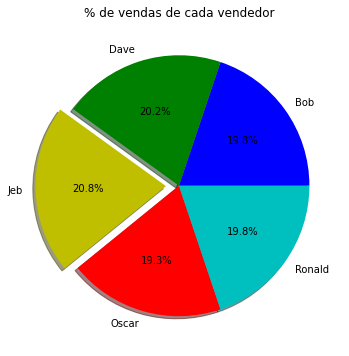

In [7]:
fig_pie, ax_pie = plt.subplots(figsize=(6, 6))
ax_pie.pie(avgs.values, # os dados para serem plotados
           labels=avgs.index, # os labels de cada dado
           explode=[0, 0, 0.1, 0, 0], # define se você que destacar o pedaço da pizza
           colors=["b", "g", "y", "r", "c"], # as cores de cada pedaço
           autopct='%1.1f%%', # o formato para aprensentar as % de cada pedaço
           shadow=True # aplica um sombreamento
          )
ax_pie.set_title("% de vendas de cada vendedor")

___
### Exercício 6
- Os nomes dos vendedores e as % de vendas estao muito pequenas. Edite o plot para que fiquem mais visíveis
    - Ex: Colocar em negrito, aumentar fonte, colocar as % na cor branca etc
___

# Barra de erro (errorbar)
- Essa é uma maneira de plotar dados com algum tipo de intervalo de erro
    - [Documentação](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.errorbar.html)

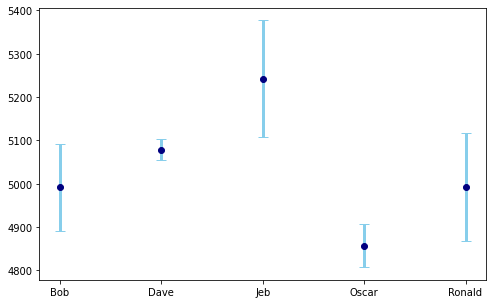

In [8]:
fig_err, ax_err = plt.subplots(figsize=(8,5))
t = ax_err.errorbar(range(len(avgs)), # posições do eixo
                avgs.values, # valores das medias
                yerr=[100, 25, 135, 50, 125], # erros de cada medida
                fmt="o", # formato do marcador da media
                color="navy", # cor do marcador
                ecolor="skyblue", # cor da barra de erro
                elinewidth=3, # espessura da linha de erro
                capsize=5 # tamanho da barrinha superior da barra de erro
               )

ax_err.xaxis.set_major_locator(plt.FixedLocator([0, 1, 2, 3, 4])) # determinando as posições do tick em X
ax_err.xaxis.set_major_formatter(plt.FixedFormatter(list(avgs.index))) # passando o nome de cada vendedor para virar um ticker

# Erro contínuo
- Uma outra maneira de representar o erro é de maneira contínua
- Podemos obter esse comportamento usando a função `plt.fill_between`
    - [Documentação](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.fill_between.html)
- Vamos simular um preditor de uma função do seno com algum erro e ver como isso fica no plot

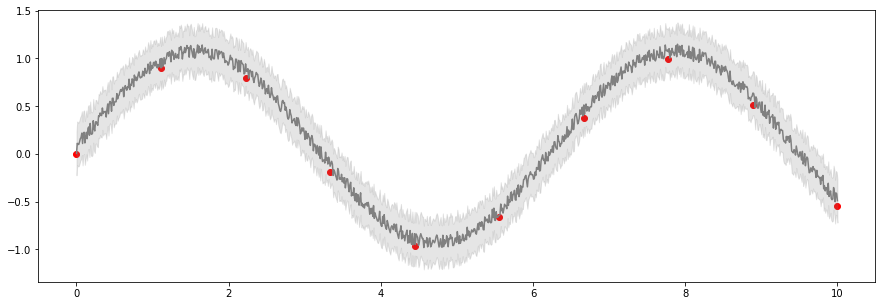

In [10]:
# Gerando nossos dados conhecidos (com valores de x e y)
x_avail = np.linspace(0, 10, 10)
y_true = np.sin(x_avail)

# Criando um dummy model e determinando qual vai ser o erro de predição dele
model_error = 0.15
dummy_model = lambda x: (np.sin(x) + model_error*np.random.rand(len(x)))
mae_func = lambda y, y_hat: np.abs(y-y_hat).mean()

# Agora vamos aplicar nosso modelo para os dados conhecidos e medir um erro
y_pred_avail = dummy_model(x_avail)
mae = mae_func(y_true, y_pred_avail)

# Vamos simular novos dados chegando no pipeline nas quais a gente não sabe a saída
# E vamos determinar que nossa confiança nessa saída é 3x o MAE que obtemos para os dados
# que já conhecemos
x_new = np.linspace(0, 10, 1000)
y_pred_new = dummy_model(x_new)
confidence = 3 * mae


# Agora vamos fazer o plot
fig_fb, ax_fb = plt.subplots(figsize=(15,5))
ax_fb.scatter(x_avail, y_true, marker="o", color="r")
ax_fb.plot(x_new, y_pred_new, color='gray')

# Esse método vai preencher os dados de acordo com um intervalo que passamos pra ela
ax_fb.fill_between(x_new, y_pred_new - confidence, y_pred_new + confidence, color='gray', alpha=0.2)

- Vamos dar uma olhada mais micro

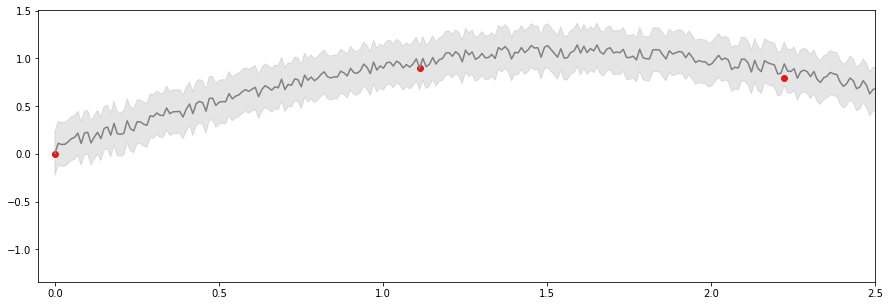

In [11]:
ax_fb.set_xlim((-0.05, 2.5))
fig_fb

# Boxplot (ou diagrama de caixas)
- O boxplot é um método gráfico de estatística descritiva para entendermos como é a dispersão dos dados de uma sequência
    - Se você não sabe nada sobre boxplot eu sugiro que dê uma olhada [neste artigo](https://www.escolaedti.com.br/o-que-e-um-box-plot)
- Vamos plotar o boxplot para nossos vendedores
- [Documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e4ec93670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e4ec9b520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e4eca3dc0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9e4eca9a30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e4ec80df0>,
 'means': []}

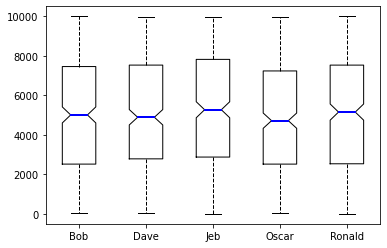

In [13]:
fig_bp, ax_bp = plt.subplots()
ax_bp.boxplot(df.values, # valores das vendas para criar o plot
              notch=True, # Estilo da caixa
              labels=df.columns, # nome dos vendedores para colocar no ticker
              medianprops=dict(linewidth=2, color="blue"), # estilizando a mediana
              whiskerprops=dict(linestyle='dashed'), # estilizando as linhas fora do box
              flierprops=dict(marker='D', markersize=5, markeredgecolor='r') # estilizando os outliers
             )

- Porém, do jeito que está o Dataframe, não conseguimos ver nenhum outlier
- Vamos adicionar alguns e plotar novamente

In [14]:
df = pd.concat([df, pd.DataFrame([[22000, 12000, 8000, 15000, 15000]], columns=df.columns)], ignore_index=True)

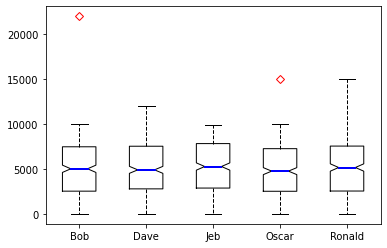

In [15]:
fig_bp, ax_bp = plt.subplots()
_ = ax_bp.boxplot(df.values, # valores das vendas para criar o plot
                  notch=True, # Estilo da caixa
                  labels=df.columns, # nome dos vendedores para colocar no ticker
                  medianprops=dict(linewidth=2, color="blue"), # estilizando a mediana
                  whiskerprops=dict(linestyle='dashed'), # estilizando as linhas fora do box
                  flierprops=dict(marker='D', markersize=5, markeredgecolor='r') # estilizando os outliers
                 )

# Violin plots 
- O Violin plot é outro método gráfico de estatística descritiva para entendermos como é a dispersão dos dados de uma sequência
    - Se você não sabe nada sobre boxplot eu sugiro que dê uma olhada [neste artigo](https://mode.com/blog/violin-plot-examples/#:~:text=What%20is%20a%20violin%20plot%3F,the%20density%20of%20each%20variable.)
- Vamos plotar o violinplot para nossos vendedores
- [Documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html)

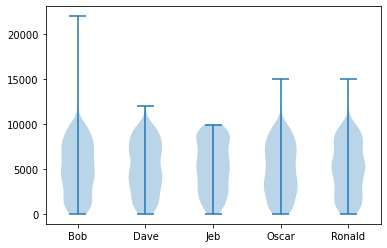

In [16]:
fig_v, ax_v = plt.subplots()
ax_v.violinplot(df.values)

ax_v.xaxis.set_major_locator(plt.FixedLocator([1, 2, 3, 4, 5])) # determinando as posições do tick em X
ax_v.xaxis.set_major_formatter(plt.FixedFormatter(df.columns)) # passando o nome de cada vendedor para virar um ticker

# Histograma
- Histograma é outro método gŕafico de estatística descritiva que demonstra uma distribuição de frequências de uma sequência de dados
    - Se você não sabe nada sobre histogramas, sugiro a leitura [deste artigo](https://www.alura.com.br/artigos/o-que-e-um-histograma)
- Vamos criar um histograma para os vendedores
- [Documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

(array([21., 20., 16., 21., 13., 14., 15., 17., 34., 12., 21., 16., 21.,
        15., 20., 25., 18.,  9., 17., 21.]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]),
 <BarContainer object of 20 artists>)

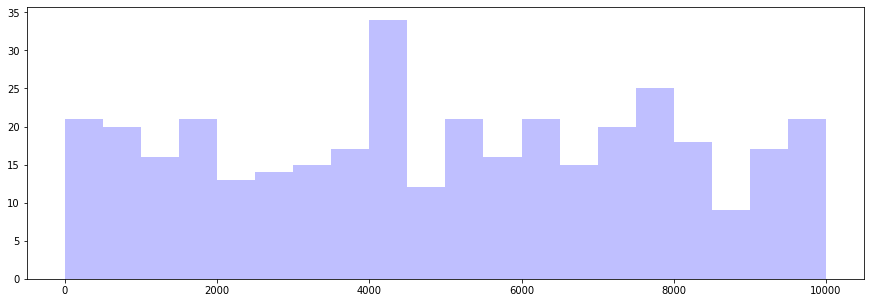

In [17]:
fig_h, ax_h = plt.subplots(figsize=(15,5))
ax_h.hist(df["Bob"], # dados para ploter
          bins=20, # quantidade de boxes
          range=(0, 10000), # Intervalo para considerar
          histtype="bar", # tipo do histograma
          alpha=0.25, # opacidade
          color="b", # cor
          label="Bob"
         ) 

- Se quisermos adicionar mais algum histograma:

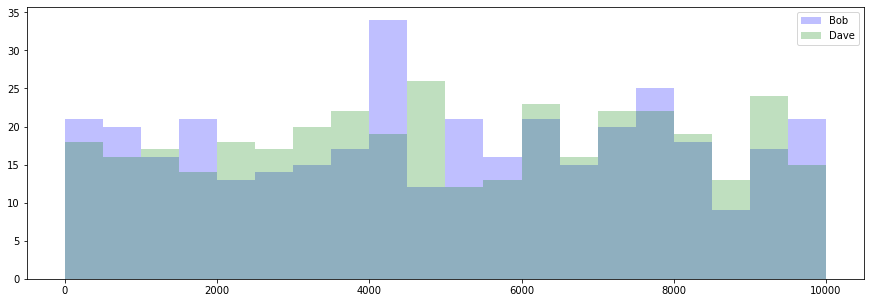

In [18]:
ax_h.hist(df["Dave"], 
          bins=20, 
          range=(0, 10000), 
          histtype="bar",
          alpha=0.25,
          color="g",
          label="Dave"
         ) 

ax_h.legend()
fig_h

- **Para exemplificar melhor um histograma de dados amostrados de uma distribuição de probabilidade, vamos plotar um de uma normal**

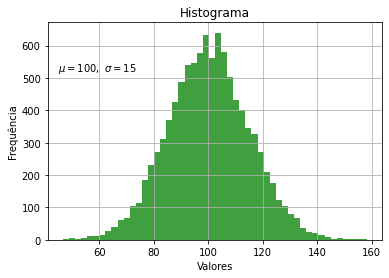

In [19]:
# Gerando os dados de uma distribuição normal com media e desvio padrão definidos abaixo
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# Criando o histograma
n, bins, patches = plt.hist(x, 50, facecolor='g', alpha=0.75)

plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.text(45, 520, r'$\mu=100,\ \sigma=15$')
plt.grid(True)